# Загрузка базы

In [1]:
import pandas as pd

data = pd.read_excel('data/initial_cleaning.xlsx')
data.head()

C:\Users\Sorra\AppData\Local\Temp\ipykernel_11268\3417920392.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Title,Type,Episodes,Episode length,Status,Genres,Themes,Age Limit,Studios,Authors,Related,Description,Seiyu,Rate,Url
0,Провожающая в последний путь Фрирен,TV Сериал,28,24 мин,онгоинг,"['Сёнен', 'Приключения', 'Драма', 'Фэнтези']",[],PG-13,['Madhouse'],"Канэхито Ямада, Кэйитиро Сайто, Ацуси Такахаси...","['Манга', 'Клип', 'ONA', 'Клип']","Одержав победу над Королём демонов, отряд геро...","Кана Итиносэ, Ацуми Танэдзаки, Ариса Киёто, Ти...",9.16,https://shikimori.one/animes/52991-sousou-no-f...
1,Стальной алхимик: Братство,TV Сериал,64,24 мин,вышло,"['Сёнен', 'Экшен', 'Приключения', 'Драма', 'Фэ...",['Военное'],R-17,['Bones'],"Хирому Аракава, Ясухиро Ириэ, Юсукэ Итагаки, С...","['Манга', 'TV Сериал', 'Спецвыпуск', 'Спецвыпу...",Ремейк одноимённого аниме-сериала «Стальной ал...,"Риэ Кугимия, Роми Пак",9.09,https://shikimori.one/animes/z5114-fullmetal-a...
2,Врата Штейна,TV Сериал,24,24 мин,вышло,"['Драма', 'Фантастика', 'Триллер']","['Психологическое', 'Путешествие во времени']",PG-13,['White Fox'],"Хироси Хамасаки, Такуя Сато, Такэси Або, Кодзи...","['TV Сериал', 'Манга', 'Спецвыпуск', 'TV Сериа...","Сняв в Акихабаре квартиру, самопровозглашённый...","Томокадзу Сэки, Асами Имаи, Кана Ханадзава, Ма...",9.07,https://shikimori.one/animes/z9253-steins-gate
3,Гинтама 4,TV Сериал,51,24 мин,вышло,"['Сёнен', 'Экшен', 'Комедия', 'Фантастика']","['Гэг-юмор', 'Исторический', 'Пародия', 'Самур...",PG-13,['Bandai Namco Pictures'],"Хидэаки Сорати, Тидзуру Мияваки, Такаёси Фукус...","['Манга', 'TV Сериал', 'Фильм', 'Спецвыпуск', ...","Никто этого уже не ждал и не надеялся, но...«П...","Асами Ягути, Мадока Ёнэдзава, Томокадзу Сугита...",9.06,https://shikimori.one/animes/z28977-gintama
4,Атака титанов 3. Часть 2,TV Сериал,10,23 мин,вышло,"['Сёнен', 'Экшен', 'Драма', 'Триллер']","['Жестокость', 'Военное', 'Выживание']",R-17,['Wit'],"Хадзимэ Исаяма, Масаси Коидзука, Тэцуро Араки,...","['Манга', 'TV Сериал', 'Фильм', 'TV Сериал']",Прямое продолжение аниме «Атака титанов 3». Эк...,"Марина Иноуэ, Юки Кадзи, Хироси Камия, Юи Исикава",9.05,https://shikimori.one/animes/38524-shingeki-no...


In [2]:
data.shape

(12417, 15)

# Удаление примеров без описания

In [3]:
data.dropna(subset=['Description'], inplace=True)

In [4]:
data.shape

(6142, 15)

# Преобразование данных

In [5]:
text = data['Description'].values
ratings = data['Rate'].values
maxWordsCount = 600

In [6]:
print(text[0])
print(ratings[0])

Одержав победу над Королём демонов, отряд героя Химмеля вернулся домой. Приключение, растянувшееся на десятилетие, подошло к завершению. Волшебница-эльф Фрирен и её отважные товарищи принесли людям мир и разошлись в разные стороны, чтобы спокойно прожить остаток жизни. Однако не всех членов отряда ждёт одинаковая участь. Для эльфов время течёт иначе, поэтому Фрирен вынужденно становится свидетелем того, как её спутники один за другим постепенно уходят из жизни. Девушка осознала, что годы, проведённые в отряде героя, пронеслись в один миг, как падающая звезда в бескрайнем космосе её жизни, и столкнулась с сожалениями об упущенных возможностях. Сможет ли она смириться со смертью друзей и понять, что значит жизнь для окружающих её людей? Фрирен начинает новое путешествие, чтобы найти ответ.
9.16


# Самодельная нейронка на основе BagOfWords

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pickle
maxWordsCount = 600
# Преобразование текста в последовательности чисел
my_tokenizer1 = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=False, split=' ', oov_token='unknown', char_level=False)
my_tokenizer1.fit_on_texts(text)
xAll = my_tokenizer1.texts_to_matrix(text)

In [26]:
print(my_tokenizer1.word_index.items()) #Вытаскиваем индексы слов для просмотра

dict_items([('unknown', 1), ('и', 2), ('в', 3), ('на', 4), ('с', 5), ('не', 6), ('—', 7), ('что', 8), ('из', 9), ('его', 10), ('по', 11), ('как', 12), ('он', 13), ('к', 14), ('за', 15), ('о', 16), ('а', 17), ('В', 18), ('но', 19), ('от', 20), ('её', 21), ('то', 22), ('для', 23), ('она', 24), ('их', 25), ('же', 26), ('чтобы', 27), ('они', 28), ('Но', 29), ('это', 30), ('только', 31), ('всё', 32), ('который', 33), ('И', 34), ('время', 35), ('так', 36), ('Однако', 37), ('у', 38), ('когда', 39), ('аниме', 40), ('со', 41), ('где', 42), ('жизнь', 43), ('ему', 44), ('все', 45), ('мир', 46), ('которые', 47), ('сериала', 48), ('ли', 49), ('после', 50), ('вместе', 51), ('жизни', 52), ('своей', 53), ('которая', 54), ('может', 55), ('под', 56), ('имени', 57), ('до', 58), ('того', 59), ('себя', 60), ('ещё', 61), ('во', 62), ('лет', 63), ('людей', 64), ('мире', 65), ('этого', 66), ('бы', 67), ('свою', 68), ('уже', 69), ('девушка', 70), ('ни', 71), ('этом', 72), ('был', 73), ('ей', 74), ('школы', 75)

In [27]:
print("Размер словаря", len(my_tokenizer1.word_index.items()))

Размер словаря 72157


In [28]:
# Сохранение объекта tokenizer
with open('my_tokenizer1.pkl', 'wb') as f:
    pickle.dump(my_tokenizer1, f)

In [29]:
# Разделение данных на обучающую, тестовую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(xAll, ratings, test_size=0.1, shuffle = True, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle = True, random_state=42)

# Печать размерности
print("Размерности обучающей, тестовой и валидационной выборок:")
print("Обучающая выборка:", X_train.shape, y_train.shape)
print("Тестовая выборка:", X_test.shape, y_test.shape)
print("Валидационная выборка:", X_val.shape, y_val.shape)

Размерности обучающей, тестовой и валидационной выборок:
Обучающая выборка: (4974, 600) (4974,)
Тестовая выборка: (615, 600) (615,)
Валидационная выборка: (553, 600) (553,)


In [30]:
X_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

Epoch 1/30
156/156 [==============================] - 1s 7ms/step - loss: 6.4217 - mean_absolute_error: 1.8585 - val_loss: 2.6293 - val_mean_absolute_error: 1.4147
Epoch 2/30
156/156 [==============================] - 1s 5ms/step - loss: 1.5704 - mean_absolute_error: 1.0021 - val_loss: 2.3289 - val_mean_absolute_error: 1.3312
Epoch 3/30
156/156 [==============================] - 1s 5ms/step - loss: 1.1939 - mean_absolute_error: 0.8674 - val_loss: 2.0283 - val_mean_absolute_error: 1.2377
Epoch 4/30
156/156 [==============================] - 1s 5ms/step - loss: 0.9921 - mean_absolute_error: 0.7900 - val_loss: 1.2091 - val_mean_absolute_error: 0.9201
Epoch 5/30
156/156 [==============================] - 1s 5ms/step - loss: 0.8623 - mean_absolute_error: 0.7321 - val_loss: 1.2340 - val_mean_absolute_error: 0.9283
Epoch 6/30
156/156 [==============================] - 1s 5ms/step - loss: 0.7971 - mean_absolute_error: 0.7081 - val_loss: 0.8896 - val_mean_absolute_error: 0.7674
Epoch 7/30
156/1

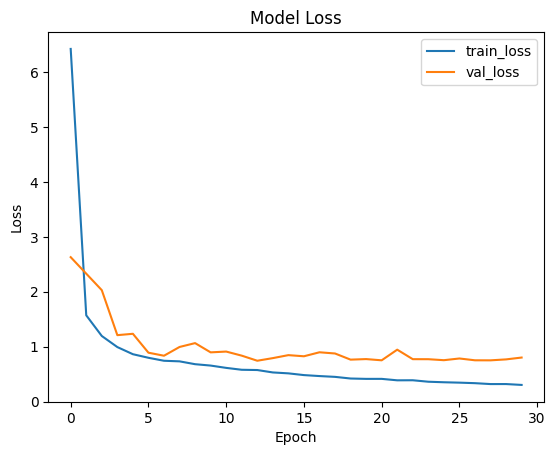

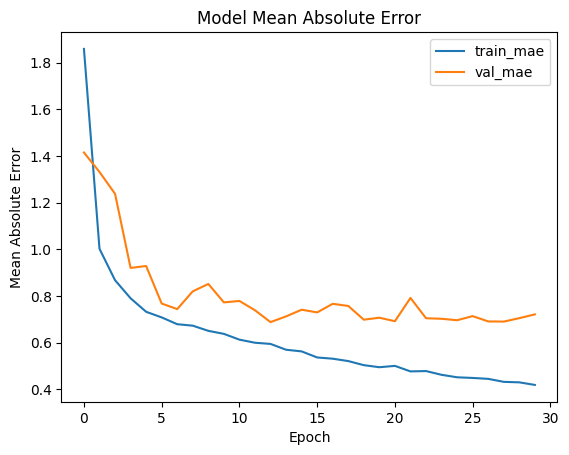

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt # Для вывода графиков

# Построение модели
model = Sequential([
    Dense(64, input_dim=maxWordsCount, activation="relu"),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dense(1)
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

# Вывод графиков
# График потерь
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# График метрики (Mean Absolute Error)
plt.plot(history.history['mean_absolute_error'], label='train_mae')
plt.plot(history.history['val_mean_absolute_error'], label='val_mae')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

In [19]:
# Оценка модели на тестовой выборке
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss on test data:", loss)
print("Mean Absolute Error on test data:", accuracy)

20/20 [==============================] - 0s 6ms/step - loss: 0.8191 - mean_absolute_error: 0.7230
Loss on test data: 0.8190826773643494
Mean Absolute Error on test data: 0.7229718565940857


# Самодельная нейронка на основе Embedding

In [31]:
import numpy as np

Sequences = my_tokenizer1.texts_to_sequences(text)
# Заполнение недостающих элементов до максимальной длины
max_len = 600
padded_sequences = pad_sequences(Sequences, maxlen=max_len)
# Создание массива numpy
npSequences = np.array(padded_sequences)

In [32]:
# Разделение данных на обучающую, тестовую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(npSequences, ratings, test_size=0.1, shuffle = True, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle = True, random_state=42)

# Печать размерности
print("Размерности обучающей, тестовой и валидационной выборок:")
print("Обучающая выборка:", X_train.shape, y_train.shape)
print("Тестовая выборка:", X_test.shape, y_test.shape)
print("Валидационная выборка:", X_val.shape, y_val.shape)

Размерности обучающей, тестовой и валидационной выборок:
Обучающая выборка: (4974, 600) (4974,)
Тестовая выборка: (615, 600) (615,)
Валидационная выборка: (553, 600) (553,)


In [33]:
X_train

array([[  0,   0,   0, ...,   1,  87,   1],
       [  0,   0,   0, ...,   1,   5,   1],
       [  0,   0,   0, ...,   1,  10,   1],
       ...,
       [  0,   0,   0, ..., 483,   1, 124],
       [  0,   0,   0, ..., 278,   4,   1],
       [  0,   0,   0, ...,   1,   1,   1]])

Epoch 1/30
39/39 [==============================] - 1s 11ms/step - loss: 9.3394 - mean_absolute_error: 2.4681 - val_loss: 13.7598 - val_mean_absolute_error: 3.5490
Epoch 2/30
39/39 [==============================] - 0s 8ms/step - loss: 7.1835 - mean_absolute_error: 2.1821 - val_loss: 12.1679 - val_mean_absolute_error: 3.3279
Epoch 3/30
39/39 [==============================] - 0s 7ms/step - loss: 6.1361 - mean_absolute_error: 2.0054 - val_loss: 10.4407 - val_mean_absolute_error: 3.0706
Epoch 4/30
39/39 [==============================] - 0s 7ms/step - loss: 5.0581 - mean_absolute_error: 1.8233 - val_loss: 9.9263 - val_mean_absolute_error: 3.0028
Epoch 5/30
39/39 [==============================] - 0s 7ms/step - loss: 4.3571 - mean_absolute_error: 1.6772 - val_loss: 7.9868 - val_mean_absolute_error: 2.6646
Epoch 6/30
39/39 [==============================] - 0s 7ms/step - loss: 3.5247 - mean_absolute_error: 1.5196 - val_loss: 6.5475 - val_mean_absolute_error: 2.3907
Epoch 7/30
39/39 [======

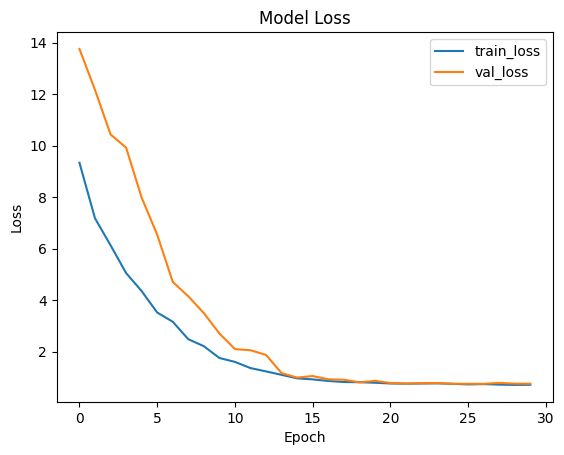

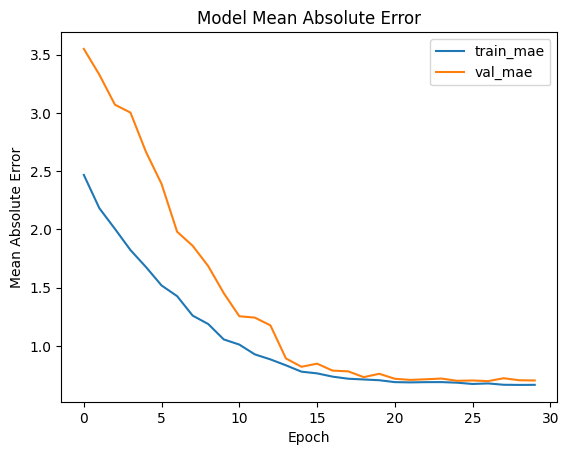

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, SpatialDropout1D, BatchNormalization

modelE = Sequential()
#Cлой представления всего словаря слов в векторном представлении
modelE.add(Embedding(maxWordsCount, 50, input_length=max_len))
#Слой регуляризации Dropout
modelE.add(SpatialDropout1D(0.2))
#Cлой преобразования двумерных данных в одномерные
modelE.add(Flatten())
#Слой пакетной нормализации
modelE.add(BatchNormalization())
#Полносвязный слой
modelE.add(Dense(64, activation="relu"))
#Слой регуляризации Dropout
modelE.add(Dropout(0.2))
modelE.add(Dense(128, activation="relu"))
#Слой регуляризации Dropout
modelE.add(Dropout(0.2))
#Слой пакетной нормализации
modelE.add(Dense(256, activation="relu"))
modelE.add(BatchNormalization())
#Выходной полносвязный слой
modelE.add(Dense(1))


# Компиляция модели
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_data=(X_val, y_val))

# Вывод графиков
# График потерь
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# График метрики (Mean Absolute Error)
plt.plot(history.history['mean_absolute_error'], label='train_mae')
plt.plot(history.history['val_mean_absolute_error'], label='val_mae')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()


In [36]:
# Оценка модели на тестовой выборке
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss on test data:", loss)
print("Mean Absolute Error on test data:", accuracy)

20/20 [==============================] - 0s 8ms/step - loss: 0.7612 - mean_absolute_error: 0.6998
Loss on test data: 0.7612178325653076
Mean Absolute Error on test data: 0.6998308897018433


# Создание модели с помощью AutoKeras

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pickle

# Преобразование текста в последовательности чисел
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)

# Ограничение длины последовательностей до maxWordsCount
maxlen = 600
sequences_padded = pad_sequences(sequences, maxlen=maxlen)

# Сохранение объекта tokenizer
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

# Разделение данных на обучающую, тестовую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(sequences_padded, ratings, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Печать размерности
print("Размерности обучающей, тестовой и валидационной выборок:")
print("Обучающая выборка:", X_train.shape, y_train.shape)
print("Тестовая выборка:", X_test.shape, y_test.shape)
print("Валидационная выборка:", X_val.shape, y_val.shape)


Размерности обучающей, тестовой и валидационной выборок:
Обучающая выборка: (4974, 600) (4974,)
Тестовая выборка: (615, 600) (615,)
Валидационная выборка: (553, 600) (553,)


In [9]:
import autokeras as ak

# Определение и обучение модели
regression = ak.StructuredDataRegressor(
    max_trials=20,  # Максимальное количество различных моделей, которые могут быть протестированы
    overwrite=True,  # Перезаписывать результаты предыдущих обучений
    loss='mean_squared_error',  # Функция потерь
    metrics=['mean_absolute_error'],  # Оптимизируемая метрика (в данном случае, минимизация потерь)
    project_name="model_02"  # Название проекта (для сохранения результатов)
)
regression.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=1)

# Сохранение лучшей модели
best_model = regression.export_model()
best_model.save('best_autokeras_model')
best_model.save('best_model3', save_format='tf')



Trial 20 Complete [00h 06m 15s]
val_loss: 41.33536148071289

Best val_loss So Far: 0.7297359704971313
Total elapsed time: 01h 54m 41s
Epoch 1/20
156/156 [==============================] - 24s 118ms/step - loss: 35.2568 - mean_absolute_error: 5.6621 - val_loss: 24.3595 - val_mean_absolute_error: 4.8542
Epoch 2/20
156/156 [==============================] - 15s 98ms/step - loss: 15.1795 - mean_absolute_error: 3.3988 - val_loss: 4.5567 - val_mean_absolute_error: 1.9696
Epoch 3/20
156/156 [==============================] - 15s 97ms/step - loss: 8.9684 - mean_absolute_error: 2.4739 - val_loss: 1.6429 - val_mean_absolute_error: 1.0766
Epoch 4/20
156/156 [==============================] - 14s 93ms/step - loss: 7.8660 - mean_absolute_error: 2.3016 - val_loss: 1.7263 - val_mean_absolute_error: 1.1033
Epoch 5/20
156/156 [==============================] - 15s 93ms/step - loss: 6.7927 - mean_absolute_error: 2.1190 - val_loss: 1.2144 - val_mean_absolute_error: 0.8729
Epoch 6/20
156/156 [============

In [10]:
from tensorflow.keras.models import load_model
loaded_model = load_model('best_autokeras_model')
loaded_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 600)]             0         
                                                                 
 multi_category_encoding (Mu  (None, 600)              0         
 ltiCategoryEncoding)                                            
                                                                 
 dense (Dense)               (None, 32)                19232     
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dropout (Dropout)           (None, 32)                0     

In [11]:
# Оценка модели на тестовых данных
loss, accuracy = loaded_model.evaluate(X_test, y_test)

# Вывод результатов
print("Loss:", loss)
print("Mean Absolute Error:", accuracy)

20/20 [==============================] - 6s 86ms/step - loss: 0.7667 - mean_absolute_error: 0.6950
Loss: 0.7666662931442261
Mean Absolute Error: 0.6950003504753113


In [16]:
import pickle
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Загрузка объекта tokenizer
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

# Новое описание аниме
new_description = ("Решив привнести в серые будни немного красок, простой офисный служащий Сасаки отправился в зоомагазин в надежде найти себе верного друга. Там его взор привлекла симпатичная говорящая птичка, и Сасаки остановил свой выбор именно на ней. Дома птица рассказала Сасаки, что на самом деле является мудрецом из иного мира и предложила ему заключить с ней контракт, от которого скучающий клерк просто не мог отказаться. Пи даровал Сасаки способность перемещаться между мирами, и теперь их ждёт уйма приключений в другом мире, но не стоит забывать о родном, ведь и он всё ещё может удивить рядового клерка и даже потустороннего мудреца!")

# Токенизация нового описания аниме
new_sequences = tokenizer.texts_to_sequences([new_description])
maxWordsCount = 600
new_sequences_padded = pad_sequences(new_sequences, maxlen=maxWordsCount)

# Загрузка модели
best_model = tf.keras.models.load_model('best_autokeras_model')

# Предсказание рейтинга для нового описания аниме
rating_prediction = best_model.predict(new_sequences_padded)

# Вывод предсказанного рейтинга
print("Предсказанный рейтинг для нового описания аниме:", rating_prediction)


1/1 [==============================] - 4s 4s/step
Предсказанный рейтинг для нового описания аниме: [[7.842849]]
